# 이산형 확률분포

## 5.1 1차원 이산형 확률분포

In [5]:
import numpy as np
import matplotlib.pyplot as plt

%precision 3
%matplotlib inline

### 1) 1차원 이산확률분포의 정의
- 확률변수 X가 취할 수 있는 값의 집합 {x1, x2, ...}
- X가 xk라는 값을 취할 확률 : P(X=xk) = pk (k=1, 2, 3, ...)
- 확률질량함수(확률함수) : f(x) = P(X=x)

예) 불공정한 주사위의 확률분포

In [6]:
# 확률변수가 취할 수 있는 값의 집합 x_set

x_set = np.array([1, 2, 3, 4, 5, 6])

In [7]:
# 불공정한 주사위의 확률변수 정의 f(x)

def f(x):
    if x in x_set:
        return x / 21
    else:
        return 0

In [8]:
# 확률변수 X = [x_set, f]

X = [x_set, f]

In [9]:
# 확률 p_k를 구한다
prob = np.array([f(x_k) for x_k in x_set])

# x_k와 p_k의 대응을 사전식으로 표시
dict(zip(x_set, prob))

{1: 0.048, 2: 0.095, 3: 0.143, 4: 0.190, 5: 0.238, 6: 0.286}

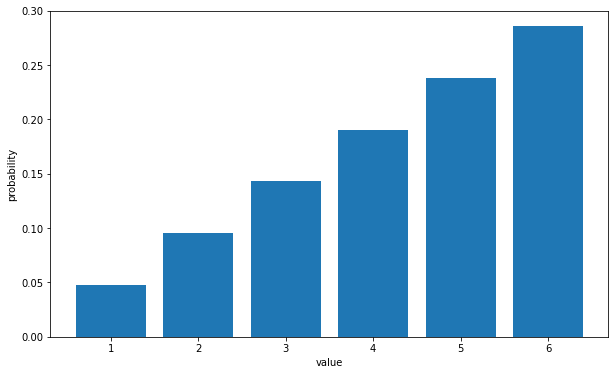

In [10]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.bar(x_set, prob)
ax.set_xlabel('value')
ax.set_ylabel('probability')

plt.show()

확률의 성질<br>
- f(xk) >= 0 : 확률은 항상 0보다 크다
- ∑f(xk) = 1 : 확률의 합은 항상 1이다

In [11]:
# 확률은 항상 0보다 크다

np.all(prob >= 0)

True

In [12]:
# 확률의 합은 항상 1이다

np.sum(prob)

1.000

누적분포함수(분포함수) F(x) : X가 x 이하가 될 때까지의 확률을 반환하는 함수<br>
F(x) = P(X <= x) = ∑f(xk)

In [13]:
# 누적분포함수 정의 F(x)

def F(x):
    return np.sum([f(x_k) for x_k in x_set if x_k <= x])
                          # x_set에서 x_k를 x_k가 x보다 작을 때

In [14]:
# 눈이 3 이하가 되는 확률
# F(x) = P(X <= 3) = ∑f(xk)

F(3)

0.286

확률변수의 변환
- 확률변수 X에 2를 곱하고 3을 더한 2X+3 도 확률변수
- 2X+3을 확률변수 Y라고 하면,

In [15]:
x_set = np.array([x_k for x_k in x_set])            # X
x_prob = np.array([f(x_k) for x_k in x_set])

y_set = np.array([2 * x_k + 3 for x_k in x_set])    # 2X+3
y_prob = np.array([f(x_k) for x_k in x_set])

In [16]:
dict(zip(x_set, x_prob))

{1: 0.048, 2: 0.095, 3: 0.143, 4: 0.190, 5: 0.238, 6: 0.286}

In [17]:
dict(zip(y_set, y_prob))                            # 값은 동일, 눈금만 달라짐

{5: 0.048, 7: 0.095, 9: 0.143, 11: 0.190, 13: 0.238, 15: 0.286}

### 2) 1차원 이산형 확률변수의 지표

#### 1.3 평균
기댓값 = 확률변수의 평균
- 확률변수를 무제한 시행하여 얻어진 실현값의 평균
- 무제한 시행할 수 없으므로, 확률변수가 취할 수 있는 값과 확률의 곱의 총합
- E(X) = ∑xk * f(xk)

예) 불공정한 주사위의 기댓값

In [18]:
np.sum([x_k * f(x_k) for x_k in x_set])
# 1*0.048 + 2*0.095 + 3*0.143 + ... + 6*0.286 = 4.333

4.333

예) 불공정한 주사위를 100만(10^6)번 굴린 실현값의 평균<br>
--> 확률분포값도 시행횟수를 늘리면 실제와 비슷한 값이 나옴

In [19]:
sample = np.random.choice(x_set, int(1e6), p=prob)
np.mean(sample)

4.335

이산형 확률변수의 기댓값

In [20]:
def E(X, g=lambda x: x):
    x_set, f = X
    return np.sum([g(x_k) * f(x_k) for x_k in x_set])

In [21]:
E(X)

4.333

기댓값의 선형성<br>
예) E(2X+3) = 2E(X)+3

In [22]:
E(X, g=lambda x: 2*x + 3)

11.667

In [23]:
2 * E(X) + 3

11.667

참고 : 람다(labmda) 함수

In [24]:
# def
def short_function(x):
    return x*2

# lambda
equiv_anon = lambda x: x*2

In [25]:
# def
def apply_to_list(some_list, f):
    return [f(x) for x in some_list]

# lambda
ints = [4, 0, 1, 5, 6]
apply_to_list(ints, lambda x: x*2)

[8, 0, 2, 10, 12]

In [26]:
strings = ['c', 'c++', 'java', 'python']
strings.sort(key = lambda x: len(set(list(x))))
strings

['c', 'c++', 'java', 'python']

#### 1.4 분산
분산 = 편차 제곱의 합<br>
V(X) = ∑(xk-mean)^2 * f(xk)
확률이 중구난방하다 = 분산이 크다<br>
편차가 크면 분산도 커진다<br>
편차가 작으면 분산도 작아진다(모델링하기 쉽다)<br>

예) 불공정한 주사위의 분산

In [27]:
mean = E(X)                                         # 평균
np.sum([(x_k-mean)**2 * f(x_k) for x_k in x_set])   # 분산(편차 제곱의 합)

2.222

이산형 확률변수의 분산

In [28]:
def V(X, g=lambda x: x):
    x_set, f = X
    mean = E(X, g)
    return np.sum([(g(x_k)-mean)**2 * f(x_k) for x_k in x_set])

In [29]:
V(X)

2.222

확률변수 Y(X)=2X+3의 분산

In [30]:
V(X, lambda x: 2*x + 3)

8.889

분산의 공식<br>
V(aX+b) = a^2 * V(x)

In [31]:
# V(2X+3) = 2^2 * V(X)

2**2 * V(X)

8.889

## 5.2 2차원 이산형 확률분포

### 1) 2차원 이산형 확률분포의 정의

결합확률분포
- 확률변수 X가 xi, 확률변수 Y가 yi를 취하는 확률<br>
- P(X = xi, Y = yi) = pij<br>
- 확률변수 X, Y의 움직임을 동시에 고려한 분포

예) 불공정한 주사위 A, B<br>
A와 B의 눈을 더한 것 X, A의 눈을 Y로 하는 2차원 확률분포

In [32]:
# X, Y가 취할 수 있는 값의 집합

x_set = np.arange(2, 13)
y_set = np.arange(1, 7)

In [33]:
# 결합확률함수

def f_XY(x, y):
    if 1 <= y <=6 and 1 <= x - y <= 6:
        return y * (x-y) / 441
    else:
        return 0

In [34]:
XY = [x_set, y_set, f_XY]

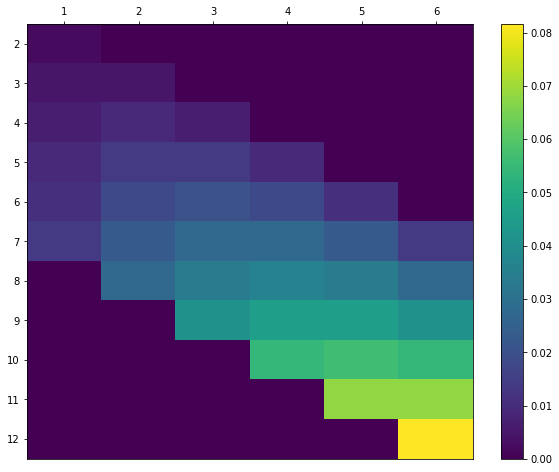

In [35]:
# 확률분포의 히트맵
# 불공정한 주사위일수록 큰 수가 나올 확률이 높다(노란색일 수록 큰 값)

prob = np.array([[f_XY(x_i, y_j) for y_j in y_set]
                 for x_i in x_set])

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)

c = ax.pcolor(prob)
ax.set_xticks(np.arange(prob.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(prob.shape[0]) + 0.5, minor=False)
ax.set_xticklabels(np.arange(1, 7), minor=False)
ax.set_yticklabels(np.arange(2, 13), minor=False)
# y축을 내림차순의 숫자가 되게 하여, 위 아래를 역전시킨다
ax.invert_yaxis()
# x축의 눈금을 그래프 위쪽에 표시
ax.xaxis.tick_top()
fig.colorbar(c, ax=ax)
plt.show()


확률의 성질<br>
- 확률은 0보다 크다
- 확률을 모두 더하면 1이다

In [36]:
# 확률은 0보다 크다

np.all(prob >= 0)

True

In [37]:
# 확률을 모두 더하면 1이다

np.sum(prob)

1.000

주변확률분포
- 확률분포(X, Y)는 결합확률분포에 의해 동시에 정의됨
- 확률변수 X의 확률함수 Fx(x)를 알고 싶을 때
- Fxy에서 Y가 취할 수 있는 값을 모두 대입한 다음 모두 더함
- Fx(x) = ∑Fxy(x, yk)  -> x 고정, y만 변화

In [38]:
# y 영향 제거, x 영향만 봄

def f_X(x):
    return np.sum([f_XY(x, y_k) for y_k in y_set])

In [39]:
# x 영향 제거, y 영향만 봄

def f_Y(y):
    return np.sum([f_XY(x_k, y) for x_k in x_set])

In [40]:
X = [x_set, f_X]
Y = [y_set, f_Y]

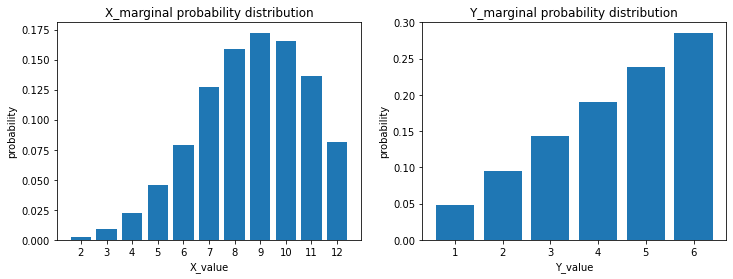

In [46]:
prob_x = np.array([f_X(x_k) for x_k in x_set])
prob_y = np.array([f_Y(y_k) for y_k in y_set])

fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(121) # 1행 2열 1번째 칸
ax2 = fig.add_subplot(122) # 1행 2열 2번째 칸

ax1.bar(x_set, prob_x)
ax1.set_title('X_marginal probability distribution')
ax1.set_xlabel('X_value')
ax1.set_ylabel('probability')
ax1.set_xticks(x_set)
# X : A+B 에 대한 확률분포
# --> 높은 값이 나올 확률이 높다


ax2.bar(y_set, prob_y)
ax2.set_title('Y_marginal probability distribution')
ax2.set_xlabel('Y_value')
ax2.set_ylabel('probability')
# Y : A 에 대한 확률분포
# --> 우상향

plt.show()

### 2) 2차원 이산형 확률분포의 지표

기댓값<br>
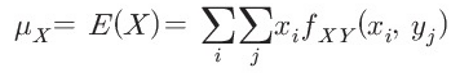

In [42]:
# 파이썬으로 구현

np.sum([x_i * f_XY(x_i, y_j) for x_i in x_set for y_j in y_set])

8.667

In [43]:
# 함수로 구현

def E(XY, g):
    x_set, y_set, f_XY = XY
    return np.sum([g(x_i, y_j) * f_XY(x_i, y_j)
                   for x_i in x_set for y_j in y_set])

In [44]:
# X의 기댓값

mean_X = E(XY, lambda x, y: x)
mean_X

8.667

In [45]:
# Y의 기댓값

mean_Y = E(XY, lambda x, y: y)
mean_Y

4.333

기댓값의 선형성<br>
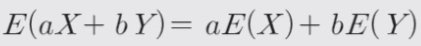


In [47]:
a, b = 2, 3

In [48]:
E(XY, lambda x, y: a*x + b*y)

30.333

In [49]:
a * mean_X + b * mean_Y

30.333

분산<br>
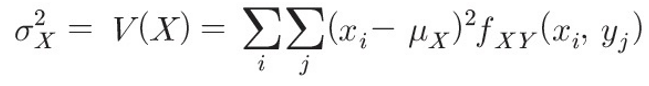

In [51]:
# 파이썬으로 구현

np.sum([(x_i-mean_X)**2 * f_XY(x_i, y_j)
       for x_i in x_set for y_j in y_set])

4.444

In [52]:
# 함수로 구현

def V(XY, g):
    x_set, y_set, f_XY = XY
    mean = E(XY, g)
    return np.sum([(g(x_i, y_j)-mean)**2 * f_XY(x_i, y_j)
                   for x_i in x_set for y_j in y_set])

In [53]:
# X 의 분산

var_X = V(XY, g=lambda x, y: x)
var_X

4.444

In [54]:
# Y 의 분산

var_Y = V(XY, g=lambda x, y: y)
var_Y

2.222

공분산 : 두 확률변수 X, Y의 상관<br>
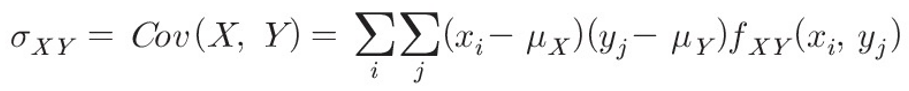

In [55]:
# 공분산

def Cov(XY):
    x_set, y_set, f_XY = XY
    mean_X = E(XY, lambda x, y: x)
    mean_Y = E(XY, lambda x, y: y)
    return np.sum([(x_i-mean_X) * (y_j-mean_Y) * f_XY(x_i, y_j)
                    for x_i in x_set for y_j in y_set])

In [56]:
cov_xy = Cov(XY)
cov_xy

2.222

분산과 공분산의 공식<br>
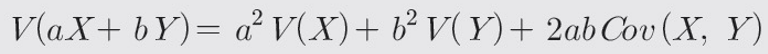

In [57]:
V(XY, lambda x, y: a*x + b*y)

64.444

In [58]:
a**2 * var_X + b**2 * var_Y + 2*a*b * cov_xy

64.444

상관계수<br>
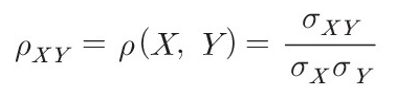

In [59]:
cov_xy / np.sqrt(var_X * var_Y)

0.707